In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime
import plotly.express as px
import sklearn

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import xgboost as xgb

import eli5 # Feature importance evaluation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer
from xgboost import plot_importance

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.
C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future ve

# 10. Comparación final

In [14]:
#Importamos los dataframe resumen de los modelos definitivos
dt = pd.read_csv("df_dt_final.csv")
bag = pd.read_csv("df_bagging_final.csv")
rf = pd.read_csv("df_randomForest_final.csv")
ab = pd.read_csv("df_Adaboost_final.csv")

#Los concatenamos
total = pd.concat([dt, bag, rf, ab])
total.index = range(total.shape[0])
total

,Model,Accuracy,Balanced accuracy,ROC AUC,F1 Score,sensitivity,specificity
0,Decision tree,0.838237,0.832842,0.886554,0.807965,0.80,0.87
1,Decision Tree Bagging,0.859701,0.855119,0.938985,0.833922,0.82,0.89
2,Random Forest,0.867804,0.861990,0.945698,0.841729,0.82,0.90
3,Adaboost,0.809240,0.799473,0.894435,0.766487,0.73,0.87


Text(0.5, 1.0, 'Area under ROC curve VS method')

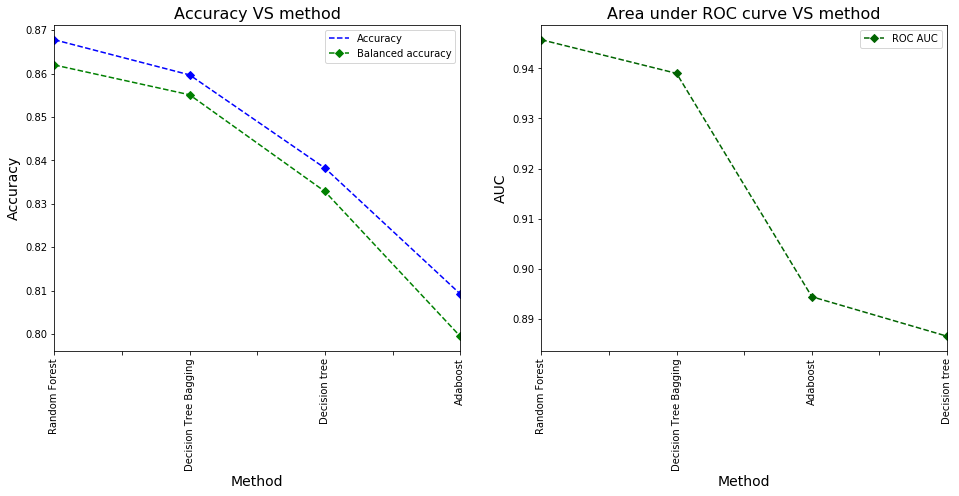

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
a = total.sort_values(by = 'Balanced accuracy', ascending=False).plot(kind='line',x='Model',y='Accuracy',ax=ax1, rot = 90, color = 'blue',linestyle ='--', marker='D')
total.sort_values(by = 'Balanced accuracy', ascending=False).plot(kind='line',x='Model',y='Balanced accuracy', color='green', ax=ax1, rot = 90,linestyle ='--', marker='D')
a.set_title('Accuracy VS method', fontsize = 16)
a.set_xlabel('Method', fontsize = 14)
a.set_ylabel('Accuracy', fontsize = 14)

b = total.sort_values(by = 'ROC AUC', ascending=False).plot(kind='line',x='Model',y='ROC AUC', rot = 90, color = 'DarkGreen',linestyle ='--', marker='D',ax=ax2)
b.set_xlabel('Method', fontsize = 14)
b.set_ylabel('AUC', fontsize = 14)
plt.title('Area under ROC curve VS method', fontsize = 16)

Text(0.5, 1.0, 'F1 VS method')

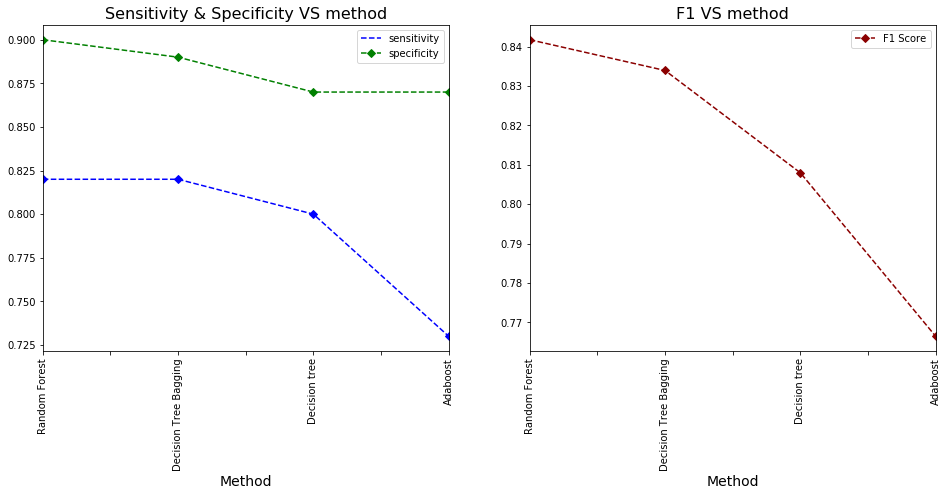

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
a = total.sort_values(by = 'specificity', ascending=False).plot(kind='line',x='Model',y='sensitivity',ax=ax1, rot = 90, color = 'blue',linestyle ='--', marker='D')
total.sort_values(by = 'specificity', ascending=False).plot(kind='line',x='Model',y='specificity', color='green', ax=ax1, rot = 90,linestyle ='--', marker='D')
a.set_title('Sensitivity & Specificity VS method', fontsize = 16)
a.set_xlabel('Method', fontsize = 14)
a.set_ylabel('', fontsize = 14)

b = total.sort_values(by = 'F1 Score', ascending=False).plot(kind='line',x='Model',y='F1 Score',ax=ax2, rot = 90, color = 'DarkRed',linestyle ='--', marker='D')
b.set_xlabel('Method', fontsize = 14)
b.set_ylabel('', fontsize = 14)
plt.title('F1 VS method', fontsize = 16)